## 1. Load Library and Iris Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
df_iris = pd.read_csv("Iris.csv")
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 2. Explore Iris Data

In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


**The data has 150 observations and 5 variables, and no missing value**

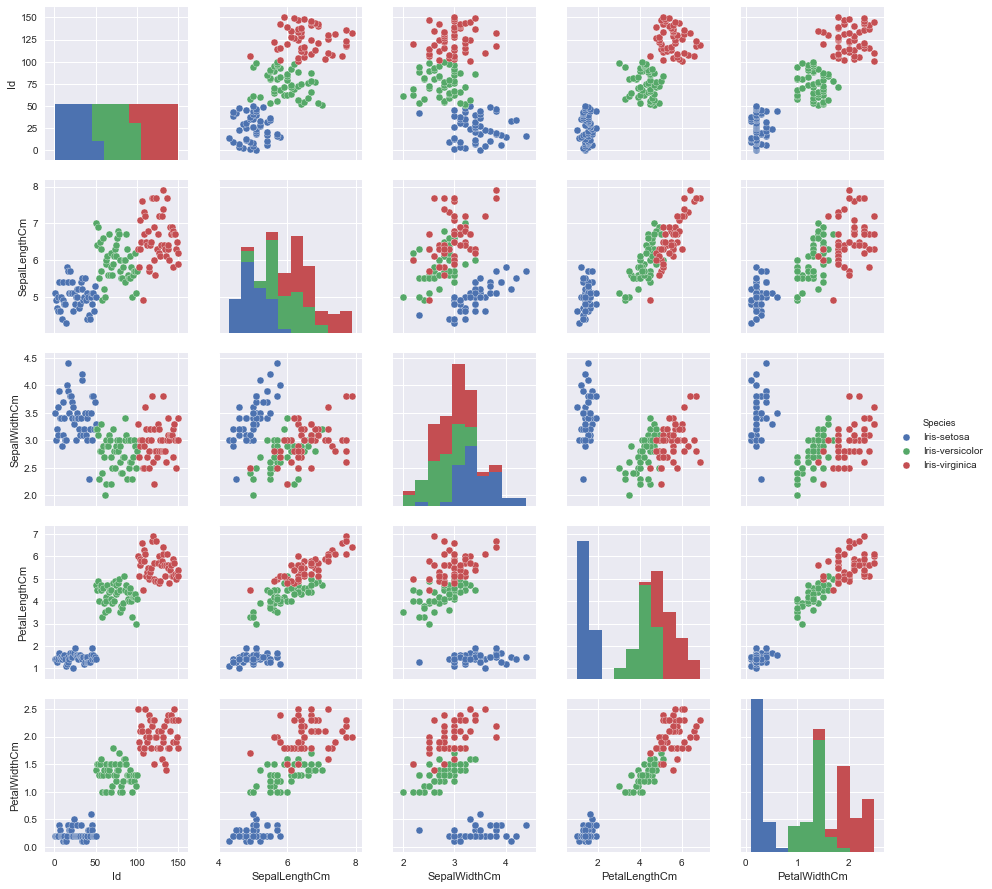

In [4]:
sns.pairplot(df_iris, hue = 'Species')

**From the pairplot graph, we can see that there are boundaries among species. Therefore, we will explore classification on this dataset**

## 3. Prepare training dataset

### 3.1 Quantify Species

In [5]:
df_iris['Species'][df_iris['Species'] =='Iris-setosa'] = 0
df_iris['Species'][df_iris['Species'] =='Iris-versicolor'] = 1
df_iris['Species'][df_iris['Species'] =='Iris-virginica'] = 2

/Users/ChuanShi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/ChuanShi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ChuanShi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imp

In [6]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


### 3.2 Split Train and Testing Dataset

In [7]:
X = df_iris.drop('Species',axis = 1)
y = df_iris['Species'].astype('int')

In [8]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [11]:
print("There are " + str(X_train.shape[0]) + 
      " samples in the train the model and " + str(X_test.shape[0]) + 
      " samples in the test the model.")

There are 90 samples in the train the model and 60 samples in the test the model.


### 3.3 Scaling X Values

In [12]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### 3.4 Support Vector Machine

In [13]:
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
print("The score of SVC on the training set is {} %.".format(svm.score(X_train_std, y_train)*100))
print("The score of SVC on the test set is {} %.".format(svm.score(X_test_std, y_test)*100))

The score of SVC on the training set is 100.0 %.
The score of SVC on the test set is 100.0 %.


### 3.5 K-Nearest Neighnors

In [15]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [16]:
print("The score of KNN with k=3 on the training set is {} %.".format(neigh.score(X_train_std, y_train)*100))
print("The score of KNN with k=3 on the test set is {} %.".format(neigh.score(X_test_std, y_test)*100))

The score of KNN with k=3 on the training set is 100.0 %.
The score of KNN with k=3 on the test set is 100.0 %.


In [18]:
X_train_std_petal = X_train_std[:,:2]
X_test_std_petal = X_test_std[:,:2]

neigh.fit(X_train_std_petal, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [19]:
# Assign Value
x_min, x_max = X_test_std_petal[:, 0].min() - 1, X_test_std_petal[:, 0].max() + 1
y_min, y_max = X_test_std_petal[:, 1].min() - 1, X_test_std_petal[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

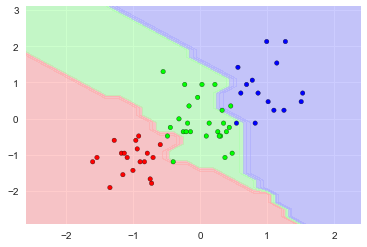

In [20]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, alpha=0.6, cmap= cmap_light)
plt.scatter(X_test_std_petal[:, 0], X_test_std_petal[:, 1], c=y_test, s=20, edgecolor='Black', 
            cmap= cmap_bold)

plt.show()